In [65]:
# Dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [44]:
# Create college dataframe.
path = 'College_Data.csv'
college_df = pd.read_csv(path, index_col='Name')

college_df.head(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80


In [45]:
# Convert Private column to 1s for Yes, 0s for No.
college_df['Private'] = college_df['Private'].map({'Yes': 1, 'No': 0})

# Drop na values.
college_df.dropna()
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


array([[<Axes: title={'center': 'Private'}>,
        <Axes: title={'center': 'Apps'}>,
        <Axes: title={'center': 'Accept'}>,
        <Axes: title={'center': 'Enroll'}>],
       [<Axes: title={'center': 'Top10perc'}>,
        <Axes: title={'center': 'Top25perc'}>,
        <Axes: title={'center': 'F.Undergrad'}>,
        <Axes: title={'center': 'P.Undergrad'}>],
       [<Axes: title={'center': 'Outstate'}>,
        <Axes: title={'center': 'Room.Board'}>,
        <Axes: title={'center': 'Books'}>,
        <Axes: title={'center': 'Personal'}>],
       [<Axes: title={'center': 'PhD'}>,
        <Axes: title={'center': 'Terminal'}>,
        <Axes: title={'center': 'S.F.Ratio'}>,
        <Axes: title={'center': 'perc.alumni'}>],
       [<Axes: title={'center': 'Expend'}>,
        <Axes: title={'center': 'Grad.Rate'}>, <Axes: >, <Axes: >]],
      dtype=object)

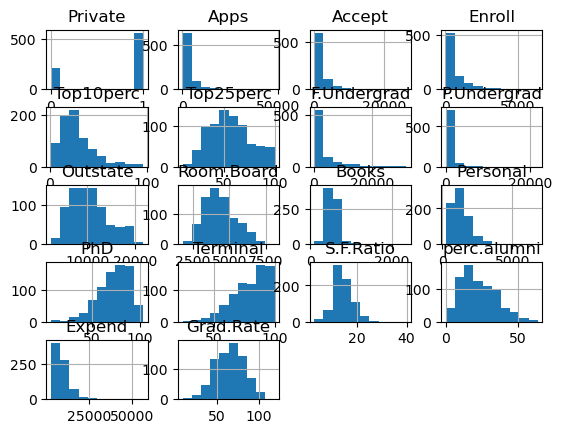

In [46]:
# Visually check for trends.
college_df.hist()

## Performing clustering without scaling.

In [47]:
# Random state assignment.
r_state = 1

# List for intertia values.
intertia = []
k = list(range(1,11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=r_state)
    k_model.fit(college_df)
    intertia.append(k_model.inertia_)

In [48]:
# Plot intertia values.
elbow_data = {'k': k, 'inertia': intertia}

elbow_df = pd.DataFrame(elbow_data)

elbow_df.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xticks = k
)

:Curve   [k]   (inertia)

We will continue using 4 clusters, where we see the elbow curve starting to level out.

In [49]:
# Perform k-means clustering with 4 clusters.
model = KMeans(n_clusters=4, random_state=r_state)
model.fit(college_df)
k_4 = model.predict(college_df)

# Add categorizations to a copy of the dataframe.
predictions = college_df.copy()
predictions['cluster'] = k_4

predictions.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Name,,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


<Axes: xlabel='Apps', ylabel='Outstate'>

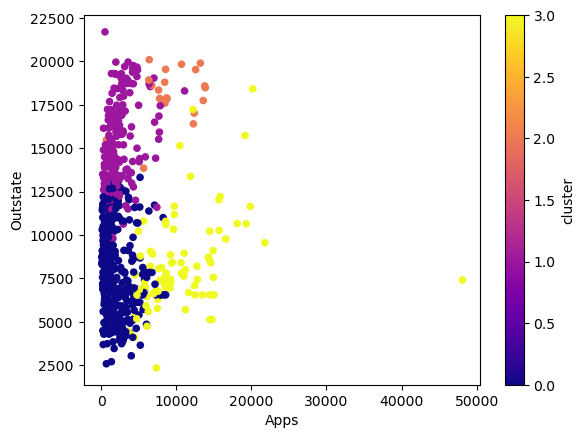

In [50]:
# Visualize the groupings along Applicants and Out of State Tuition.
predictions.plot.scatter(
    x='Apps',
    y='Outstate',
    c='cluster',
    cmap = 'plasma'
)


<Axes: xlabel='Enroll', ylabel='Expend'>

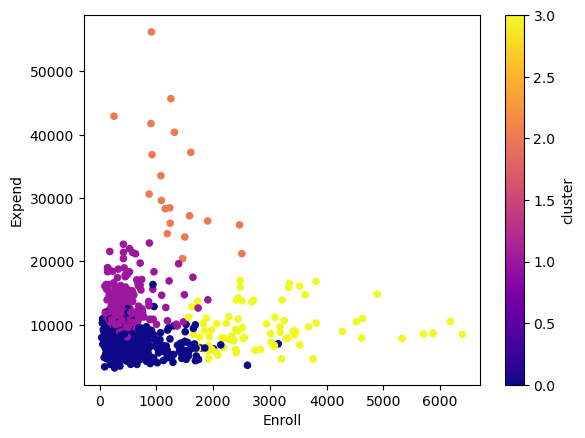

In [51]:
# Visualize the groupings along number of students enrolled and per student expenditure.
predictions.plot.scatter(
    x='Enroll',
    y='Expend',
    c='cluster',
    cmap = 'plasma'
)

## K-means clustering on scaled data.

In [52]:
# Scale columns in college_df.
scaled_data = StandardScaler().fit_transform(college_df)

scaled_df = pd.DataFrame(scaled_data,
                         columns=["Private",
                                  "Apps",
                                  "Accept",
                                  "Enroll",
                                  "Top10perc",
                                  "Top25perc",
                                  "F.Undergrad",
                                  "P.Undergrad",
                                  "Outstate",
                                  "Room.Board",
                                  "Books",
                                  "Personal",
                                  "PhD",
                                  "Terminal",
                                  "S.F.Ratio",
                                  "perc.alumni",
                                  "Expend",
                                  "Grad.Rate"])

#Revert 'Private' back to binary encoding.
scaled_df['Private'] = college_df['Private'].values
scaled_df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,1,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,1,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,1,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,1,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,1,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,1,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


In [53]:
# Generate elbow plot to choose a number of clusters.

# List for intertia values.
intertia = []
k = list(range(2,11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=r_state)
    k_model.fit(scaled_df)
    intertia.append(k_model.inertia_)
    values = k_model.predict(scaled_df)
    print(silhouette_score(scaled_df, values))

elbow_data = {'k': k, 'inertia': intertia}

elbow_df = pd.DataFrame(elbow_data)

elbow_df.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xticks = k
)

0.22581336875816935
0.23960789803089688
0.18288033154270492
0.17827488226670396
0.1686717328774499
0.1412850624024195
0.14159032941720667
0.14095505231242814
0.1220512196459593


:Curve   [k]   (inertia)

Again, we will proceed clustering the data into 4 groups.

In [54]:
# Perform K-means clustering with 4 groups on the scaled data.
model = KMeans(n_clusters=4, random_state=r_state)
model.fit(scaled_df)
k_4 = model.predict(scaled_df)

# Add categorizations to a copy of the dataframe.
scaled_predictions = scaled_df.copy()
scaled_predictions['cluster'] = k_4

In [55]:
# Visualize the groupings along Applicants and Out of State Tuition.
scaled_predictions.hvplot.scatter(
    x='Apps',
    y='Outstate',
    by='cluster'
)

:NdOverlay   [cluster]
   :Scatter   [Apps]   (Outstate)

In [56]:
# Visualize the groupings along number of fulltime undergrads and number of PhD faculty.
scaled_predictions.hvplot.scatter(
    x='F.Undergrad',
    y='PhD',
    by='cluster'
)

:NdOverlay   [cluster]
   :Scatter   [F.Undergrad]   (PhD)

In [57]:
# Visualize the groupings along number of students enrolled and per student expenditure.
predictions.hvplot.scatter(
    x='S.F.Ratio',
    y='perc.alumni',
    by='cluster'
)

:NdOverlay   [cluster]
   :Scatter   [S.F.Ratio]   (perc.alumni)

## Perform PCA dimensionality reduction to acheive better groupings.

In [58]:
# Create PCA model with 3 components.
pca = PCA(n_components=3)

# Fit data to PCA model.
pca_data = pca.fit_transform(scaled_df)

pca_data[:5]

array([[-1.59750785,  0.69639219, -0.10384276],
       [-2.17839529, -0.66697819,  2.37431945],
       [-1.41254584, -1.1449002 , -0.41825971],
       [ 2.89094177, -2.59299362,  0.09483013],
       [-2.20721598, -0.05237487,  2.37037095]])

In [59]:
# Find and sume the variance ratios.
ratios = pca.explained_variance_ratio_

print(ratios.sum())

0.6515561355436101


The sum of the variance ratios tells us that using 3 components will only explain approximately 65.16% of the variance in the original dataset.

In [60]:
# Create a Dataframe with PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['School'] = college_df.index
pca_df = pca_df.set_index('School')
pca_df.head()

,PCA1,PCA2,PCA3
School,,,
Abilene Christian University,-1.597508,0.696392,-0.103843
Adelphi University,-2.178395,-0.666978,2.374319
Adrian College,-1.412546,-1.144900,-0.418260
Agnes Scott College,2.890942,-2.592994,0.094830
Alaska Pacific University,-2.207216,-0.052375,2.370371


In [61]:
# Perform K-means clustering with 4 groups.
model = KMeans(n_clusters=4)
model.fit(pca_df)
k_4 = model.predict(pca_df)

# Find silhouette score.
print(silhouette_score(pca_df, k_4))

0.34116237515520614


In [62]:
# Prepare the predictions dataframe.
predictions = pca_df.copy()
predictions['cluster'] = k_4
predictions.head()

,PCA1,PCA2,PCA3,cluster
School,,,,
Abilene Christian University,-1.597508,0.696392,-0.103843,3
Adelphi University,-2.178395,-0.666978,2.374319,3
Adrian College,-1.412546,-1.144900,-0.418260,3
Agnes Scott College,2.890942,-2.592994,0.094830,1
Alaska Pacific University,-2.207216,-0.052375,2.370371,3


<Axes: xlabel='PCA1', ylabel='PCA2'>

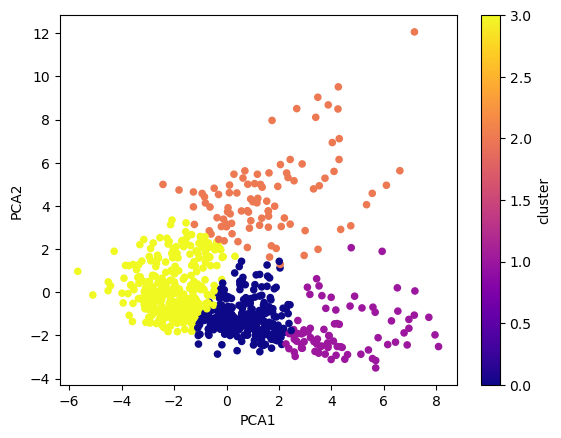

In [63]:
predictions.plot.scatter(
    x='PCA1',
    y='PCA2',
    c='cluster',
    cmap = 'plasma'
)

In [64]:
fig = px.scatter_3d(predictions, x='PCA1', y='PCA2', z='PCA3', color='cluster')
fig.show()
